In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
btc_4h = pd.read_csv ('./btc_4h.csv', encoding='unicode_escape')

In [41]:
btc_4h['time'] = btc_4h['time'].str.extract('(\d{4}-\d{2}-\d{2}\w\d{2}:\d{2}:\d{2})', expand=True)
btc_4h['time'] = pd.to_datetime(btc_4h["time"])
btc_4h.set_index("time", inplace = True)

In [42]:
btc_4h = btc_4h[4000:]
len(btc_4h)

1759

In [43]:
def buySell_RSI(btc_4h):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_4h)):
    if (btc_4h ['close'][i] >= btc_4h ["Upper ATR 3"][i] and btc_4h ['Volume'][i] > btc_4h["Volume"].mean()):
      if flag != 1:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_4h['close'][i])
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (btc_4h ['close'][i] <= btc_4h ["Lower ATR 1"][i]):
      if flag != 0:
        sigPriceBuy.append(btc_4h["close"][i])
        sigPriceSell.append(np.nan)
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [44]:
buySell_RSI = buySell_RSI(btc_4h)
btc_4h['Buy Signal ATR'] = buySell_RSI[0]
btc_4h['Sell Signal ATR'] = buySell_RSI[1]
# To show the data
btc_4h.head()

,close,Volume,VWAP,EMA 1,EMA 2,EMA 3,EMA 4,EMA 5,Upper ATR 1,Lower ATR 1,Upper ATR 3,Lower ATR 3,K,RSI,Buy Signal ATR,Sell Signal ATR
time,,,,,,,,,,,,,,,,
2022-02-06 13:00:00,41485.0,16494.384,41575.28966,41309.32664,40257.56470,39579.85817,39038.45360,39027.14784,40981.94859,39533.18080,42430.71637,38084.41302,78.362804,70.968012,NaN,NaN
2022-02-06 17:00:00,41676.0,4392.798,41578.16150,41390.80961,40386.51336,39699.63771,39132.65169,39079.60036,41079.79840,39693.22832,42466.36849,38306.65823,66.932997,72.365130,NaN,NaN
2022-02-06 21:00:00,42350.0,9567.414,41714.84100,41603.96303,40565.01215,39851.08698,39247.55698,39144.36075,41292.24111,39837.78318,42746.69905,38383.32524,73.018174,76.637651,NaN,NaN
2022-02-07 01:00:00,42783.0,14819.863,42426.00000,41865.97125,40766.64740,40018.62487,39373.82281,39216.41301,41535.14573,39998.14908,43072.14239,38461.15242,81.642038,78.895122,NaN,NaN
2022-02-07 05:00:00,42727.5,7185.073,42532.77236,42057.42208,40944.90673,40173.41773,39493.59699,39285.93948,41690.54804,40199.26543,43181.83064,38707.98282,93.560881,77.856659,NaN,NaN


In [45]:
btc_4h.describe()
btc_4h.loc[btc_4h["Volume"] == btc_4h.Volume.max()]

,close,Volume,VWAP,EMA 1,EMA 2,EMA 3,EMA 4,EMA 5,Upper ATR 1,Lower ATR 1,Upper ATR 3,Lower ATR 3,K,RSI,Buy Signal ATR,Sell Signal ATR
time,,,,,,,,,,,,,,,,
2022-11-08 17:00:00,18250.5,405624.985,18991.10827,19707.30187,20321.8179,20470.72081,20490.81057,20344.38899,20896.07593,19747.55987,22044.59199,18599.04381,-6.510000e-15,13.258718,NaN,NaN


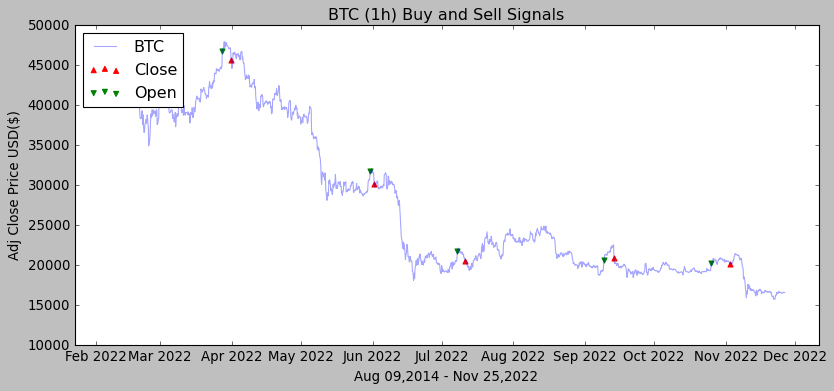

In [46]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(btc_4h['close'], label='BTC', alpha=0.35)
plt.plot(btc_4h['Buy Signal ATR'], label='', alpha=0.35)
plt.plot(btc_4h['Sell Signal ATR'],label='', alpha=0.35)
plt.scatter(btc_4h.index, btc_4h['Buy Signal ATR'], label ='Close', marker='^',color='red')
plt.scatter(btc_4h.index, btc_4h['Sell Signal ATR'],label='Open', marker='v', color='green')
plt.title('BTC (1h) Buy and Sell Signals')
plt.xlabel("Aug 09,2014 - Nov 25,2022")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper left')
plt.show()